In [241]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix

In [242]:
import warnings
warnings.filterwarnings('ignore')
path = '/Users/guozhiqi-seven/Google Drive/NYU Master/Intro to DS/Airbnb Project/listings.csv'
df = pd.read_csv(path)

In [243]:
useful_cols = ['accommodates',
               'bathrooms',
               'bedrooms',
               'beds',
               'number_of_reviews',
               'cancellation_policy',
               'reviews_per_month',
               'neighbourhood_cleansed',
               'neighbourhood_group_cleansed',
               'instant_bookable',
               'review_scores_rating',
               'room_type',
               'host_identity_verified',
               'price',
               'availability_30',
               'minimum_nights',
               'extra_people']

In [244]:
df = df[useful_cols]
df.shape

(38810, 17)

In [245]:
'''convert price from object to float '''

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float) 

df['extra_people'] = df['extra_people'].str.replace('$', '')
df['extra_people'] = df['extra_people'].str.replace(',', '')
df['extra_people'] = df['extra_people'].astype(float)

'''drop all value in features:bathrooms bedrooms beds == 0 
   replace NaN to 0 for reviews_per_month&review_scores_rating (convert to 0 but do not drop NaN value instance)'''
df['reviews_per_month'].fillna(0 , inplace = True)
df['review_scores_rating'] .fillna(0 , inplace = True)
#df['bathrooms'].dropna(axis=0)
#df['bedrooms'].dropna(axis=0)
#df['beds'].dropna(axis=0) 

df = df[df['bedrooms'] != 0]
df = df[df['beds'] != 0]
df = df[df['beds'] != 0]
df = df[df['price'] != 0] 
df = df.dropna(axis=0)

In [246]:
print(df.shape)
df.head(5)

(35221, 17)


,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy,reviews_per_month,neighbourhood_cleansed,neighbourhood_group_cleansed,instant_bookable,review_scores_rating,room_type,host_identity_verified,price,availability_30,minimum_nights,extra_people
0,2,1.0,1.0,1.0,15,moderate,0.75,City Island,Bronx,f,92.0,Private room,t,65.0,21,1,10.0
1,3,1.0,1.0,1.0,10,flexible,0.82,City Island,Bronx,f,92.0,Entire home/apt,t,125.0,16,3,0.0
2,4,1.0,1.0,2.0,16,flexible,4.57,City Island,Bronx,t,98.0,Entire home/apt,t,79.0,0,1,10.0
3,4,3.0,3.0,3.0,0,strict,0.00,City Island,Bronx,f,0.0,Entire home/apt,f,300.0,0,7,25.0
4,4,1.0,1.0,1.0,59,moderate,4.36,City Island,Bronx,t,97.0,Private room,t,59.0,11,1,10.0


In [247]:
df['manhattan'] = np.where(df['neighbourhood_group_cleansed']=='Manhattan', 1, 0)
df['brooklyn'] = np.where(df['neighbourhood_group_cleansed']=='Brooklyn', 1, 0)
df['queens'] = np.where(df['neighbourhood_group_cleansed']=='Queens', 1, 0)
df['bronx/si'] = np.where((df['neighbourhood_group_cleansed']=='Staten Island'), 1, 0)
df['temp'] = np.where((df['neighbourhood_group_cleansed']=='Bronx'), 1, 0)
df['bronx/si'] = df['bronx/si']+df['temp']
df = df.drop(['temp'],axis=1)
df.head(5)

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy,reviews_per_month,neighbourhood_cleansed,neighbourhood_group_cleansed,instant_bookable,...,room_type,host_identity_verified,price,availability_30,minimum_nights,extra_people,manhattan,brooklyn,queens,bronx/si
0,2,1.0,1.0,1.0,15,moderate,0.75,City Island,Bronx,f,...,Private room,t,65.0,21,1,10.0,0,0,0,1
1,3,1.0,1.0,1.0,10,flexible,0.82,City Island,Bronx,f,...,Entire home/apt,t,125.0,16,3,0.0,0,0,0,1
2,4,1.0,1.0,2.0,16,flexible,4.57,City Island,Bronx,t,...,Entire home/apt,t,79.0,0,1,10.0,0,0,0,1
3,4,3.0,3.0,3.0,0,strict,0.00,City Island,Bronx,f,...,Entire home/apt,f,300.0,0,7,25.0,0,0,0,1
4,4,1.0,1.0,1.0,59,moderate,4.36,City Island,Bronx,t,...,Private room,t,59.0,11,1,10.0,0,0,0,1


In [248]:
df.shape

(35221, 21)

In [249]:
'''Binning the listing price to 5 price interval, each price interval has approximately same nubmer of instance'''

labels = ["[$10-65]","[$65-95]","[$95-130]","[$130-197]","[$197-10000]"]
df['price_binning'] = pd.qcut(df['price'], 5 ,labels = labels )
print('How the binning prices distributed:\n',df['price_binning'].value_counts())
df.head(5) 

How the binning prices distributed:
 [$10-65]        7921
[$130-197]      7051
[$197-10000]    7034
[$65-95]        6623
[$95-130]       6592
Name: price_binning, dtype: int64


,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy,reviews_per_month,neighbourhood_cleansed,neighbourhood_group_cleansed,instant_bookable,...,host_identity_verified,price,availability_30,minimum_nights,extra_people,manhattan,brooklyn,queens,bronx/si,price_binning
0,2,1.0,1.0,1.0,15,moderate,0.75,City Island,Bronx,f,...,t,65.0,21,1,10.0,0,0,0,1,[$10-65]
1,3,1.0,1.0,1.0,10,flexible,0.82,City Island,Bronx,f,...,t,125.0,16,3,0.0,0,0,0,1,[$95-130]
2,4,1.0,1.0,2.0,16,flexible,4.57,City Island,Bronx,t,...,t,79.0,0,1,10.0,0,0,0,1,[$65-95]
3,4,3.0,3.0,3.0,0,strict,0.00,City Island,Bronx,f,...,f,300.0,0,7,25.0,0,0,0,1,[$197-10000]
4,4,1.0,1.0,1.0,59,moderate,4.36,City Island,Bronx,t,...,t,59.0,11,1,10.0,0,0,0,1,[$10-65]


In [250]:
df['price_class'] = np.where(df['price_binning']=="[$10-65]", 1, 0)
df['price_class'][df['price_binning']=="[$65-95]"] = 2
df['price_class'][df['price_binning']=="[$95-130]"] = 3
df['price_class'][df['price_binning']=="[$130-197]"] = 4
df['price_class'][df['price_binning']=="[$197-10000]"] = 5
df.head(5) 

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy,reviews_per_month,neighbourhood_cleansed,neighbourhood_group_cleansed,instant_bookable,...,price,availability_30,minimum_nights,extra_people,manhattan,brooklyn,queens,bronx/si,price_binning,price_class
0,2,1.0,1.0,1.0,15,moderate,0.75,City Island,Bronx,f,...,65.0,21,1,10.0,0,0,0,1,[$10-65],1
1,3,1.0,1.0,1.0,10,flexible,0.82,City Island,Bronx,f,...,125.0,16,3,0.0,0,0,0,1,[$95-130],3
2,4,1.0,1.0,2.0,16,flexible,4.57,City Island,Bronx,t,...,79.0,0,1,10.0,0,0,0,1,[$65-95],2
3,4,3.0,3.0,3.0,0,strict,0.00,City Island,Bronx,f,...,300.0,0,7,25.0,0,0,0,1,[$197-10000],5
4,4,1.0,1.0,1.0,59,moderate,4.36,City Island,Bronx,t,...,59.0,11,1,10.0,0,0,0,1,[$10-65],1


In [251]:
'''features which need to be convert to dummy variables'''

for i in useful_cols:
    if df[i].dtypes == object:
        print(i,':',df[i].dtypes) 

cancellation_policy : object
neighbourhood_cleansed : object
neighbourhood_group_cleansed : object
instant_bookable : object
room_type : object
host_identity_verified : object


In [252]:
df['cancellation_policy'].value_counts()

strict             14843
flexible           12114
moderate            8255
super_strict_30        5
no_refunds             2
super_strict_60        1
long_term              1
Name: cancellation_policy, dtype: int64

In [253]:
df['cp_flexible'] = np.where(df['cancellation_policy']=="flexible", 1, 0)
df['cp_moderate'] = np.where(df['cancellation_policy']=="moderate", 1, 0)
df['cp_strict'] = np.where(df['cancellation_policy']=="strict", 1, 0)  #fix typo

df['instant_bookable'] = np.where(df['instant_bookable']=="t", 1, 0) 

df['host_identity_verified'] = np.where(df['host_identity_verified']=="t", 1, 0)

df['entire'] = np.where(df['room_type']=="Entire home/apt", 1, 0) #fix error
df['private'] = np.where(df['room_type']=="Private room ", 1, 0)
df['shared'] = np.where(df['room_type']=="Shared room", 1, 0)

In [255]:
'''re-index the dataframe'''
df = df.reset_index(drop=True)
df

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy,reviews_per_month,neighbourhood_cleansed,neighbourhood_group_cleansed,instant_bookable,...,queens,bronx/si,price_binning,price_class,cp_flexible,cp_moderate,cp_strict,entire,private,shared
0,2,1.0,1.0,1.0,15,moderate,0.75,City Island,Bronx,0,...,0,1,[$10-65],1,0,1,0,0,0,0
1,3,1.0,1.0,1.0,10,flexible,0.82,City Island,Bronx,0,...,0,1,[$95-130],3,1,0,0,1,0,0
2,4,1.0,1.0,2.0,16,flexible,4.57,City Island,Bronx,1,...,0,1,[$65-95],2,1,0,0,1,0,0
3,4,3.0,3.0,3.0,0,strict,0.00,City Island,Bronx,0,...,0,1,[$197-10000],5,0,0,1,1,0,0
4,4,1.0,1.0,1.0,59,moderate,4.36,City Island,Bronx,1,...,0,1,[$10-65],1,0,1,0,0,0,0
5,4,1.0,1.0,2.0,54,strict,1.47,City Island,Bronx,0,...,0,1,[$95-130],3,0,0,1,1,0,0
6,5,2.5,2.0,2.0,5,flexible,0.56,City Island,Bronx,1,...,0,1,[$130-197],4,1,0,0,1,0,0
7,2,1.0,1.0,1.0,11,moderate,1.96,City Island,Bronx,0,...,0,1,[$65-95],2,0,1,0,0,0,0
8,3,1.0,1.0,2.0,75,strict,1.68,Allerton,Bronx,0,...,0,1,[$10-65],1,0,0,1,0,0,0
9,1,1.0,1.0,1.0,24,strict,0.49,Allerton,Bronx,0,...,0,1,[$10-65],1,0,0,1,0,0,0


In [256]:
'''find out all neighbourhood location where the occurence is below threshold  '''
threshold = 200
grp = df.groupby(['neighbourhood_cleansed']) 
index_2_del = grp.filter(lambda x: len(x) <= threshold).index 
index_2_del

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            35210, 35211, 35212, 35213, 35214, 35216, 35217, 35218, 35219,
            35220],
           dtype='int64', length=4811)

In [257]:
'''In order to increase the performance and the accuracy of our classification, drop all instances which 
   the neighbourhood location occur less than 'threshold' times in the dataset. '''
alldata = df.copy() 
alldata.drop(alldata.index[index_2_del],inplace=True) 
alldata.shape    #now alldata is the dataset without all instances occur blow threshold

(30410, 29)

In [258]:
'''get dummies for all neighbourhood_cleansed'''
nc_dummy = pd.get_dummies(alldata['neighbourhood_cleansed'])        #neighbourhood_cleansed
nc_dummy.head(3)

,Astoria,Bedford-Stuyvesant,Bushwick,Carroll Gardens,Chelsea,Chinatown,Clinton Hill,Crown Heights,Ditmars Steinway,East Harlem,...,Ridgewood,SoHo,South Slope,Sunnyside,Sunset Park,Upper East Side,Upper West Side,Washington Heights,West Village,Williamsburg
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
'''Drop all original categorical columns '''
drop_cols = ['cancellation_policy','neighbourhood_cleansed','neighbourhood_group_cleansed',
             'room_type','host_identity_verified','instant_bookable','price','price_binning']
alldata=alldata.drop(drop_cols,axis = 1) 
print(alldata.shape) 
alldata.columns

(30410, 21)


Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
       'reviews_per_month', 'review_scores_rating', 'availability_30',
       'minimum_nights', 'extra_people', 'manhattan', 'brooklyn', 'queens',
       'bronx/si', 'price_class', 'cp_flexible', 'cp_moderate', 'cp_strict',
       'entire', 'private', 'shared'],
      dtype='object')

In [260]:
'''Join dataset with the dummy_variable matrix'''
frames = [alldata,nc_dummy.astype(int)]
alldata = pd.concat(frames,axis=1)
alldata.shape

(30410, 61)

In [271]:
alldata.head(5) 

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,reviews_per_month,review_scores_rating,availability_30,minimum_nights,extra_people,...,Ridgewood,SoHo,South Slope,Sunnyside,Sunset Park,Upper East Side,Upper West Side,Washington Heights,West Village,Williamsburg
26,4,1.0,2.0,2.0,0,0.00,0.0,30,1,0.0,...,0,0,0,0,0,0,0,0,0,0
27,2,1.0,1.0,1.0,1,1.00,100.0,7,5,0.0,...,0,0,0,0,0,0,0,0,0,0
28,1,1.0,1.0,1.0,0,0.00,0.0,16,7,0.0,...,0,0,0,0,0,0,0,0,0,0
29,1,1.0,1.0,1.0,23,2.41,92.0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
30,2,1.0,1.0,1.0,5,1.21,85.0,0,2,25.0,...,0,0,0,0,0,0,0,0,0,0


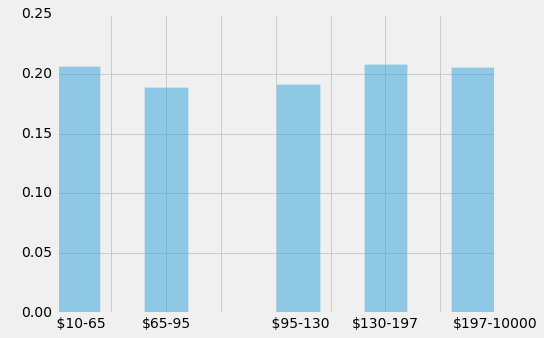

In [272]:
'''Base-rate plot''' 
plt.style.use('fivethirtyeight')
ax = plt.subplot(111)
weights = np.ones_like(alldata['price_class'])/len(alldata['price_class'])
names = ['           $10-65','','$65-95','','           $95-130','','$130-197','','$197-10000']
ax.set_xticklabels(names) 
alldata['price_class'].hist(alpha=0.5,figsize=(7, 5),weights=weights) 

In [278]:
'''split train and test by 80/20'''
X_train, X_test, y_train, y_test = train_test_split(alldata.drop('price_class', axis=1),alldata['price_class'], test_size=0.2, random_state=0)

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc,roc_auc_score
import time

In [284]:
t1 = time.clock()
LogReg = LogisticRegression(C=1e30)
LogReg = LogReg.fit(X_train,y_train)
SVM = SVC(kernel="linear")
SVM = SVM.fit(X_train,y_train) 
#SVM_prediction = SVM.decision_function(X_test) 
#LogReg_prediction = LogReg.predict_proba(X_test)[:,1] 
result = [LogReg.score(X_test,y_test),SVM.score(X_test,y_test)] 
#result = [LogReg.score(X_test,y_test)] 

t2 = time.clock() 

In [285]:
print ("run time:%f s" % (t2 -t1))  

run time:2005.256740 s


In [286]:
result

[0.5179217362709635, 0.51545544228872087]

In [291]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train,y_train)
clf_rf.score(X_test,y_test)

0.5149621834922723

In [292]:
'''Since generally LR takes much shorter time than SVM algorithm, for time efficiency purpose,
   we try to increase LR classifier's performance by normalizing features and tuning the parameter'''

from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

t3 = time.clock()

steps = [('polyfeat', PolynomialFeatures()),
         #('scaler', StandardScaler()),
         ('lr', LogisticRegression())] 

#set up the pipeline
pipeline = Pipeline(steps) 

parameters = dict(lr__C = [10**i for i in range(-5,5)], 
                           polyfeat__degree = [1,2],
                           polyfeat__interaction_only = [True,False],
                           lr__penalty = ['l1', 'l2'])


LR_grid_search = GridSearchCV(pipeline, param_grid = parameters, cv = 3, scoring = 'accuracy') 
LR_grid_search.fit(X_train, y_train)


#get the score of the best model and print it
best_LR = LR_grid_search.best_score_
print('best_LR: ',best_LR) 

best_estimator = LR_grid_search.best_estimator_
print('best_estimator: ',best_estimator) 
t4 = time.clock() 

print ("run time for tunning:%f s" % (t4-t3))   

best_LR:  0.543900032884
best_estimator:  Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
run time for tunning:4883.181163 s
